In [70]:
from PIL import Image 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib 

from scipy.ndimage import convolve, correlate, uniform_filter, gaussian_filter, median_filter, rotate
from scipy.ndimage import prewitt, sobel, laplace

from skimage import filters
from skimage.data import camera
from skimage.util import random_noise
from skimage import feature

from skimage import data, util, exposure, color 
from skimage.morphology import (square, rectangle, diamond, disk, cube,
                                octahedron, ball, octagon, star,
                                binary_erosion, binary_dilation, binary_opening, binary_closing,
                               remove_small_holes, label, convex_hull_image, skeletonize, thin, reconstruction,
                               opening, closing, dilation, erosion)

from skimage.filters import threshold_otsu

In [75]:
#APARTADO 1:Leer y representar la imagen riceBGgradient.tif

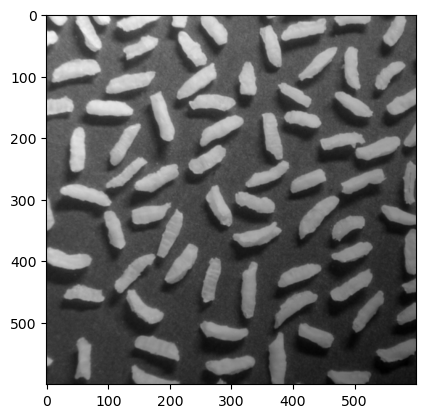

In [7]:
img1 = 'images/riceBGgradient.tif'
img_1  = Image.open(img1)
plt.imshow(img_1,cmap='gray'); #muestro por pantalla

In [ ]:
#Intenta separar los granos del fondo estableciendo un umbral

In [ ]:
#Debemos mostrar el histograma de la foto para saber los distintos valores y poder establecer un umbral

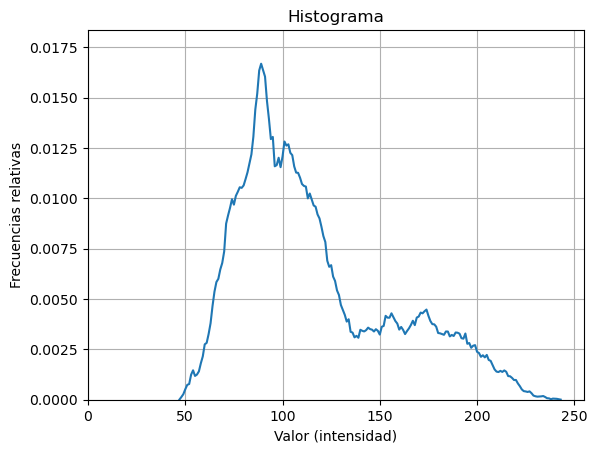

In [60]:
img_np1 = np.array(img_1)
img_hist, bins = exposure.histogram(img_np1, normalize=True)

plt.plot(bins, img_hist)
plt.axis([0,255, 0, 1.1*img_hist.max()])
plt.title('Histograma')
plt.xlabel('Valor (intensidad)')
plt.ylabel('Frecuencias relativas')
plt.grid()

In [ ]:
#en este caso he estblecido el valor 50 y 130 ya que el 50 es el minimo y en torno a 130 se estabilizan.

Text(0.5, 1.0, 'Imagen modificada')

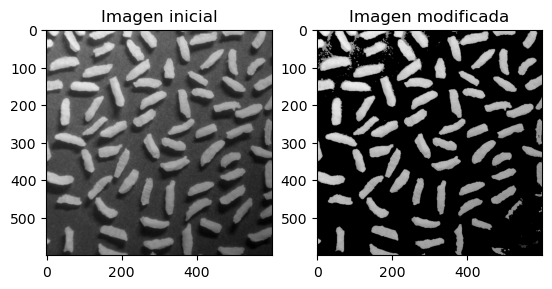

In [51]:
th1, th2 = 50, 130

mask = np.logical_not(np.logical_and(img_np1 >=th1, img_np1 <= th2))

img_tot=img_np1 * mask


plt.subplot(121)
plt.imshow(img_np1, cmap='gray')
plt.title('Imagen inicial')
plt.subplot(122)
plt.imshow(img_tot, cmap='gray')
plt.title('Imagen modificada')

In [ ]:
#De esta manera he conseguido poner muchas zonas de la imagen en negro el fondo. 

In [39]:
#De esta manera he conseguido poner muchas zonas de la imagen en negro el fondo. Aunque es muy complicado sacar solo 
#los granos. En las esquinas superior izquierda me ha quedado fondo y en la esquina de abajo derecha me he comido varios granos.

In [ ]:
#APARTADO 3:Como habrás visto, no es posible obtener un resultado satisfactorio debido a la 
#inhomogeneidad en la iluminación. Utiliza una transformación morfológica top-hat
#para corregir la iluminación, tal y como se ha hecho en clase

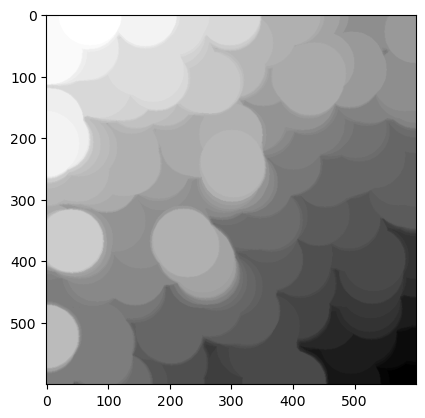

In [56]:
ilum = opening(img_np1, disk(50))
plt.imshow(ilum, cmap='gray')
#Aqui estamos viendo la iluminacion en general que tiene la imagen para despues eliminar las zonas de mayores variaciones y que quede homogenea

Text(0.5, 1.0, 'Imagen modificada')

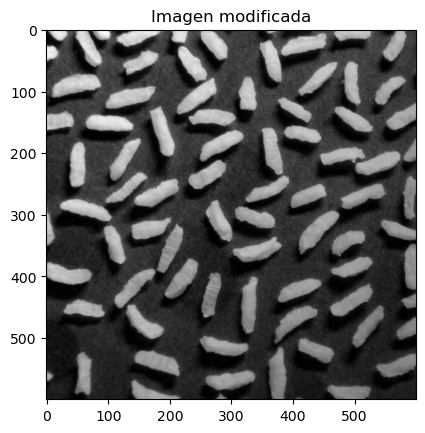

In [61]:
img_final = img_np1-ilum
plt.imshow(img_final, cmap='gray')
plt.title('Imagen modificada')
#Con esto conseguimos quitarle zonas claras a la parte superior y zonas oscuras a la parte inferior para que la imagen 
#se vuelva más homogenea.

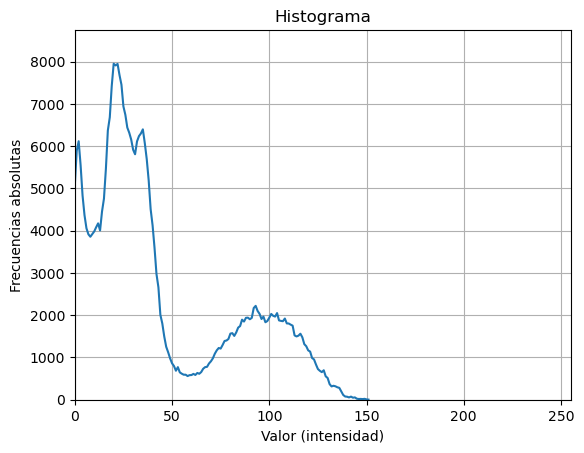

In [59]:
img_hist2, bins = exposure.histogram(img_final, normalize=False)
plt.plot(bins, img_hist2)
plt.axis([0,255, 0, 1.1*img_hist2.max()])
plt.title('Histograma')
plt.xlabel('Valor (intensidad)')
plt.ylabel('Frecuencias absolutas')
plt.grid()

Text(0.5, 1.0, 'Imagen modificada')

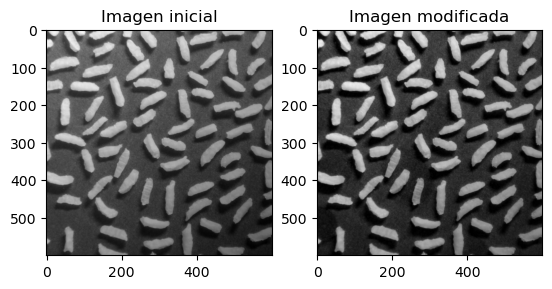

In [67]:
plt.subplot(121)
plt.imshow(img_np1, cmap='gray')
plt.title('Imagen inicial')
plt.subplot(122)
plt.imshow(img_final, cmap='gray')
plt.title('Imagen modificada')

In [68]:
#de esta manera si que quedarán más homogéneos los colores ya que nuestras intensidades han cambiado.

In [ ]:
#APARTADO 4: Busca ahora un umbral. Para buscar el umbral, puedes ayudarte con la función 
#“skimage.filters.threshold_otsu”

In [71]:
print("Umbral: ")
print(threshold_otsu(img_final))

Umbral: 
60


Text(0.5, 1.0, 'Imagen modificada')

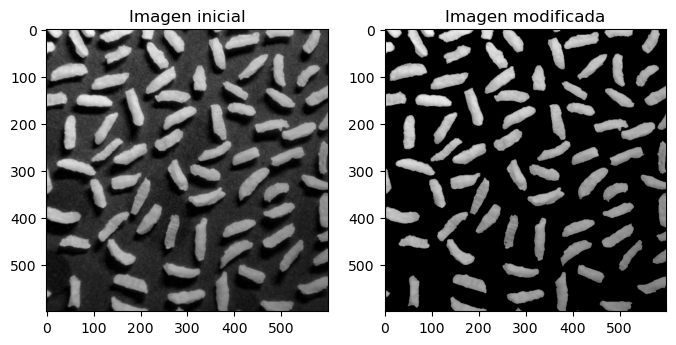

In [74]:
th_1, th_2 = 60, 255 #definimos 60 como valor inicial porque es lo que nos da el humbral. De esta manera pondremos todo el 
#fondo a mas de 60, que en nuestra imagen es negro.

mask = np.logical_and(img_final >= th_1, img_final <= th_2)

img_final2 = img_final*mask

plt.figure(figsize=(8, 8))

plt.subplot(121)
plt.imshow(img_final, cmap='gray')
plt.title('Imagen inicial')

plt.subplot(122)
plt.imshow(img_final2, cmap='gray')
plt.title('Imagen modificada')